# rorolite iris demo

Simple Machine Learning application to showcase how to deploy ML applications to a remote server.

This uses the famous iris dataset to create a decision tree model and deploys it as an API.

The iris dataset has sepal length, sepal width, petal length and petal width features of 150 labeled samples of iris flowers. The flowers belong to three different classes Setosa, Versicolour and Verginica.

<p>
<img style="display: inline;" src="images/iris-setosa.png"> 
<img style="display: inline;" src="images/iris-versicolour.png"> 
<img style="display: inline;" src="images/iris-virginica.png">
</p>


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

## The Dataset

In [43]:
import sklearn
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()

In [45]:
iris.keys()

dict_keys(['target_names', 'feature_names', 'data', 'DESCR', 'target'])

In [46]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [47]:
X = iris['data']
y = iris['target']
columns = iris['feature_names']
classes = iris['target_names']

In [48]:
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
classes

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [50]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [51]:
y[:5]

array([0, 0, 0, 0, 0])

## Explore

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame(X, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [54]:
df['target'] = y

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


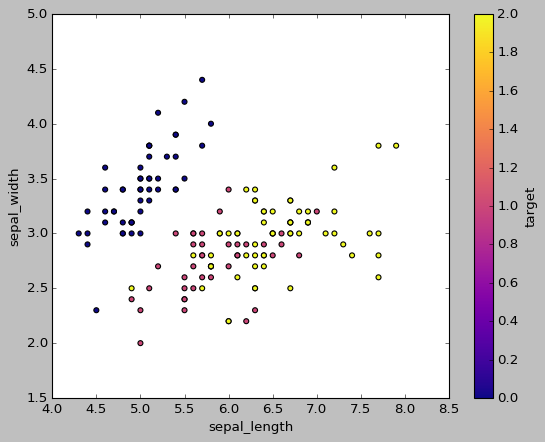

In [56]:
df.plot(kind='scatter', x='sepal_length', y="sepal_width", c='target', cmap='plasma')

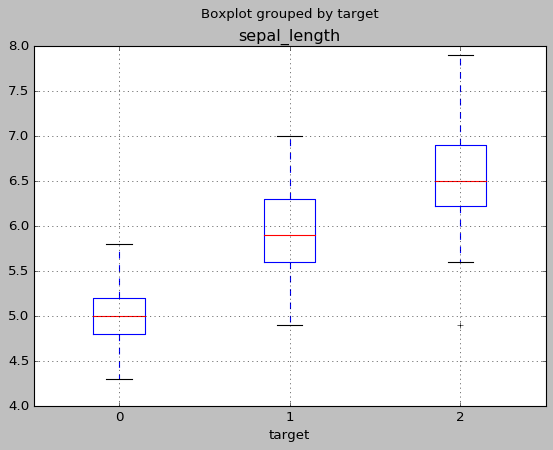

In [57]:
df.boxplot(column='sepal_length', by='target');

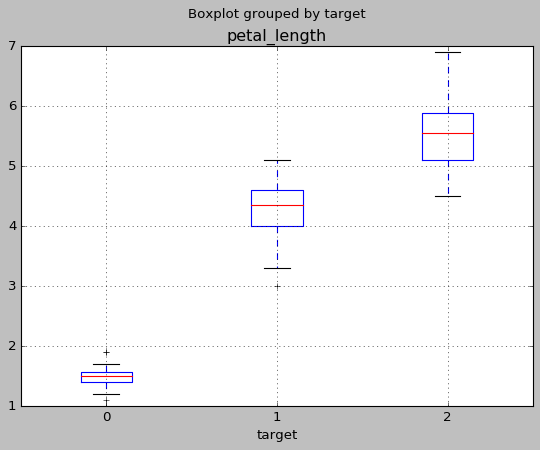

In [58]:
df.boxplot(column='petal_length', by='target');

/Users/anand/anaconda/envs/rx/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


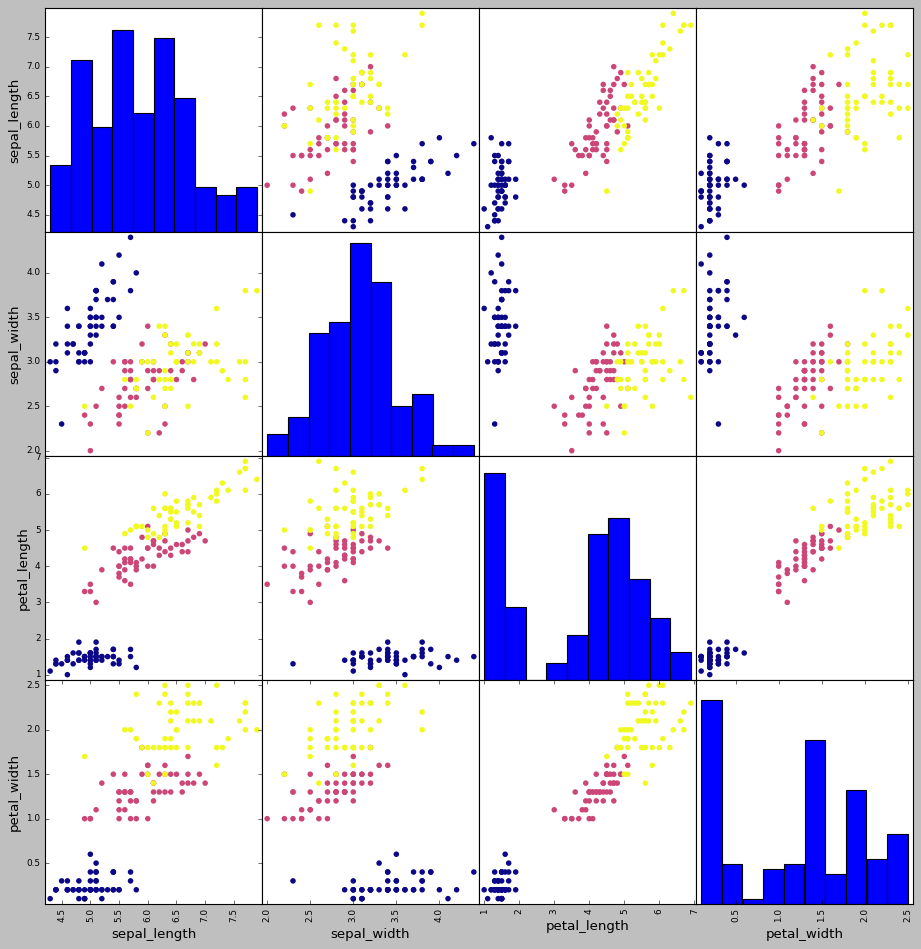

In [59]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df.drop("target", axis=1), figsize=(14, 14), cmap='plasma', c=df.target, s=100, alpha=1);

## Train

Let us train a decision tree model to detect the classes. 

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Lets us see how well the model is predicting.

In [21]:
y_predicted = model.predict(X)

In [22]:
sum(y_predicted == y)

144

In [23]:
len(y)

150

In [24]:
accuracy = sum(y_predicted == y) / len(y)
print(accuracy)

0.96


Let us save this model to a file.

In [25]:
import joblib

In [26]:
joblib.dump(model, "iris_model.pkl")

['iris_model.pkl']

# Model API

The model can be run as an API using [firefly][1].

[1]: https://rorodata.github.io/firefly

The file `model.py` file has simple predict function that loads the model from the saved file and returns the predicted class.

Run the following command in your terminal/command-prompt to run the predict function as an API.

    firefly predict.predict 
    
In the argument, the first `predict` is the module name and the secone one is the function name. That starts running the API on the URL `http://127.0.0.1:8000/`.

Not that the API is running, let us try using it through the client.

In [6]:
import firefly

In [63]:
iris_api = firefly.Client("http://127.0.0.1:8000/")

The client exposes the same functions that are available in the API. So, we'll be able to call the predict function though it.

In [107]:
# sample rows
df.iloc[::25]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
25,5.0,3.0,1.6,0.2,0
50,7.0,3.2,4.7,1.4,1
75,6.6,3.0,4.4,1.4,1
100,6.3,3.3,6.0,2.5,2
125,7.2,3.2,6.0,1.8,2


In [94]:
classes

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [110]:
iris_api.predict(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2)

'setosa'

In [109]:
iris_api.predict(sepal_length=7.0, sepal_width=3.2, petal_length=4.7, petal_width=1.4)

'versicolor'

In [108]:
iris_api.predict(sepal_length=6.3, sepal_width=3.3, petal_length=6.0, petal_width=2.5)

'virginica'

Now that we know how to run the model as an API in the local computer, let us see how to deploy it to a remote server.

## Deploying to a remote server

While the [firefly][] allows you to run a python function as an API on any machine, the [rorolite][] tool takes it one step further and allows you to deploy it to any remote server while taking care of all provisioning, deploying and all  other devops overheads.

[firefly]: https://rorodata.github.io/firefly
[rorolite]: https://rorodata.github.io/rorolite

Lets start with installing `rorolite`:

    $ pip install rorolite

There is a file called `rorolite.yml` in this directory, edit it to change the hostname and username in it.

```
#
# rorolite config file
# The rorolite command uses this file to find out what to deploy and where to deploy.
#
runtime: python3

# hostname/ip of your remote server
host: iris.do.rorodata.net
# user name on the remote server
user: anand

services:
    - name: api
      function: predict.predict
      port: 80
```

Provision the server once by running:
    
```    
$ rorolite provision
...
```

This installs all the required software on the server system wide. 

Deploy the application using:
    
```
$ rorolite deploy
...
Services are live at:
  api -- http://iris.do.rorodata.net:80/
```

The API is now live on the server, you'll be able to access it at <http://iris.do.rorodata.net> (in my case, replace it with your hostname/ip).

Remember that the remote server does not have the model yet. Let us run `train.py` to build the model.

```
$ rorolite run train.py
[iris.do.rorodata.net] run: python train.py
loading iris dataset
training the decision tree model
accuracy is 0.96
saving the model
```

Now the API is ready to be used.

In [11]:
# replace iris.do.rorodata.net with your hostname/ip
remote_iris = firefly.Client("http://iris.do.rorodata.net/")

In [8]:
remote_iris.predict(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2)

'setosa'

In [9]:
remote_iris.predict(sepal_length=7.0, sepal_width=3.2, petal_length=4.7, petal_width=1.4)

'versicolor'

In [10]:
remote_iris.predict(sepal_length=6.3, sepal_width=3.3, petal_length=6.0, petal_width=2.5)

'virginica'

In case you haven't realized it yet, these results are returned by our API deployed on the remote server.